In [2]:
# step 1 : data processing, CSV file I/O (e.g. pd.read_csv)

In [215]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [32]:
# install all these libraries (machine learning)

In [33]:
pip install pandas numpy scikit-learn matplotlib


^C
Note: you may need to restart the kernel to use updated packages.


In [216]:

#select one of the dataset provided below and download it using the given below link.
#https://www.kaggle.com/hesh97/titanicdataset-traincsv/download

In [217]:

# Load the dataset
df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
#step 2:
#2.present your data with data frames ,description  and shapes.

In [219]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)



Shape of the dataset: (891, 12)


In [220]:

#  dataframe
print("\nDataframe Description:")
print(df.describe(include='all'))




Dataframe Description:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Pa

In [221]:
# Display data types and missing values
print("\nData Types and Missing Values:")
print(df.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [222]:
#step 3:
#Perform KNN,on the above dataset

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Drop unnecessary columns
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Define feature variables and target
X = df.drop('Survived', axis=1)
y = df['Survived']
print(X.head())
print("----------------------------------------------------------------")
print(y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2
----------------------------------------------------------------
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [224]:
#step 4:
#4.Generate a random 80/20 split (using dataset. Split (0.8)) 
##train the model on the 80% fraction and then evaluate the accuracy of the model

In [225]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Train the model
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")


KNN Accuracy: 0.6662


In [226]:
#step 5:
#5.Repeat this 100 times and average the result - hint: do the repetition in code 

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold

# List to store accuracy results
accuracy_results = []

# StratifiedKFold for consistent class distribution across splits
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=24)

# Repeat the process 100 times
for _ in range(100):
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Initialize and train the KNN model
        knn_model = KNeighborsClassifier(n_neighbors=7)
        knn_model.fit(X_train, y_train)
        
        # Make predictions and evaluate accuracy
        y_predictions = knn_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_predictions)
        accuracy_results.append(accuracy)

# Compute the average accuracy over all runs
mean_accuracy = np.mean(accuracy_results)
print("Average Accuracy after 100 repetition :", mean_accuracy)


Average Accuracy after 100 repetition : 0.6991930271078252


In [228]:
#step 6:
#6.Create a graph with matplotlib library with these results. with above random results show 

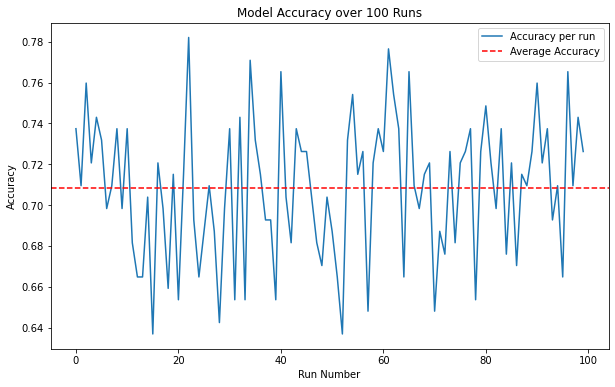

In [229]:
import matplotlib.pyplot as plt

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(accuracies, label='Accuracy per run')
plt.axhline(y=average_accuracy, color='r', linestyle='--', label='Average Accuracy')
plt.title('Model Accuracy over 100 Runs')
plt.xlabel('Run Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


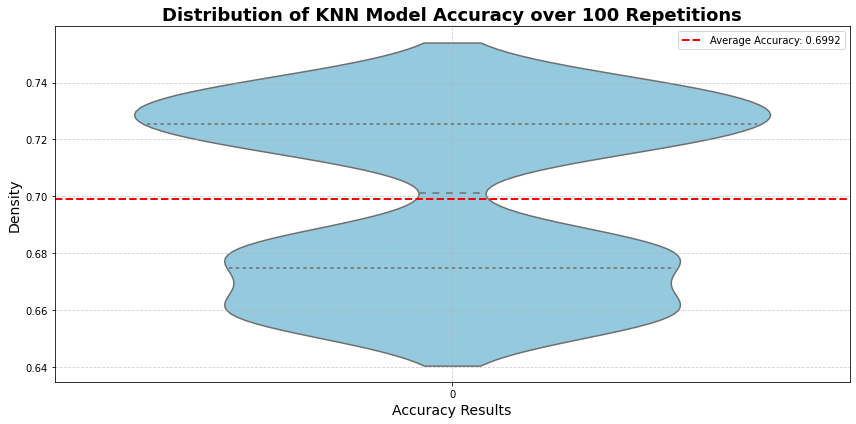

In [230]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.violinplot(data=accuracy_results, inner='quartile', color='skyblue')
plt.axhline(y=mean_accuracy, color='red', linestyle='--', linewidth=2, label=f'Average Accuracy: {mean_accuracy:.4f}')
plt.title('Distribution of KNN Model Accuracy over 100 Repetitions', fontsize=18, fontweight='bold')
plt.xlabel('Accuracy Results', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
